In [49]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [50]:
path = r"C:\Users\Arifin\Downloads\papaya\Combined_Leaf.csv"
df = pd.read_csv(path,index_col=0)
df = df.reset_index()
df.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1.999632,3.093702,2.033272,3.002799,0.633460,0.571372,0.635272,0.581739,0.170648,0.156667,0.172241,0.159826,0.865883,0.791993,0.863330,0.798109,Papaya Fresh Leaf
1,1,0.722365,1.579700,1.301654,1.719493,0.915808,0.885972,0.889406,0.879521,0.718141,0.713230,0.715649,0.712989,0.988634,0.975208,0.979519,0.973014,Papaya Fresh Leaf
2,2,0.699969,1.998093,1.621354,1.975702,0.925097,0.882642,0.889191,0.881281,0.749311,0.742571,0.745322,0.742694,0.986119,0.960490,0.967848,0.960933,Papaya Fresh Leaf
3,3,0.358762,0.608781,0.472656,0.670496,0.911386,0.891686,0.896863,0.882874,0.404194,0.393967,0.397970,0.391944,0.989202,0.981726,0.985777,0.979875,Papaya Fresh Leaf
4,4,0.322227,0.559339,0.365273,0.499239,0.914601,0.890028,0.899300,0.885933,0.430124,0.416377,0.423192,0.414672,0.989225,0.981354,0.987790,0.983360,Papaya Fresh Leaf


In [51]:
df.shape

(290, 18)

In [52]:
df.describe()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,30.055172,2.730053,4.004278,2.708280,4.037056,0.724608,0.673031,0.725979,0.672046,0.304381,0.289274,0.304638,0.289224,0.887507,0.836804,0.889513,0.835418
std,18.916235,1.569669,2.037242,1.526318,2.045037,0.125969,0.137457,0.122049,0.137917,0.177709,0.176843,0.176173,0.177148,0.072311,0.094296,0.071455,0.095235
min,0.000000,0.237760,0.412626,0.263710,0.422268,0.443385,0.418674,0.441471,0.407525,0.108920,0.097947,0.100415,0.095287,0.613236,0.515019,0.635982,0.482207
25%,14.000000,1.511776,2.347028,1.536336,2.381453,0.620249,0.551028,0.623504,0.550100,0.145027,0.132160,0.147435,0.131843,0.842035,0.782129,0.849238,0.778329
50%,28.500000,2.568490,3.994302,2.619669,4.028658,0.720309,0.655138,0.717382,0.656673,0.201670,0.190792,0.207620,0.189852,0.891392,0.834174,0.893543,0.830536
75%,45.000000,3.809509,5.358035,3.821864,5.468900,0.830649,0.784447,0.828506,0.785288,0.474007,0.450429,0.469585,0.449702,0.945178,0.913080,0.953990,0.913202
max,72.000000,7.715732,10.384667,7.749449,10.185467,0.945703,0.921877,0.939214,0.924708,0.771433,0.765493,0.768943,0.765491,0.991926,0.986406,0.992110,0.988026


In [53]:
df = df.rename(columns={'16': 'Class'})
df.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Class
0,0,1.999632,3.093702,2.033272,3.002799,0.633460,0.571372,0.635272,0.581739,0.170648,0.156667,0.172241,0.159826,0.865883,0.791993,0.863330,0.798109,Papaya Fresh Leaf
1,1,0.722365,1.579700,1.301654,1.719493,0.915808,0.885972,0.889406,0.879521,0.718141,0.713230,0.715649,0.712989,0.988634,0.975208,0.979519,0.973014,Papaya Fresh Leaf
2,2,0.699969,1.998093,1.621354,1.975702,0.925097,0.882642,0.889191,0.881281,0.749311,0.742571,0.745322,0.742694,0.986119,0.960490,0.967848,0.960933,Papaya Fresh Leaf
3,3,0.358762,0.608781,0.472656,0.670496,0.911386,0.891686,0.896863,0.882874,0.404194,0.393967,0.397970,0.391944,0.989202,0.981726,0.985777,0.979875,Papaya Fresh Leaf
4,4,0.322227,0.559339,0.365273,0.499239,0.914601,0.890028,0.899300,0.885933,0.430124,0.416377,0.423192,0.414672,0.989225,0.981354,0.987790,0.983360,Papaya Fresh Leaf


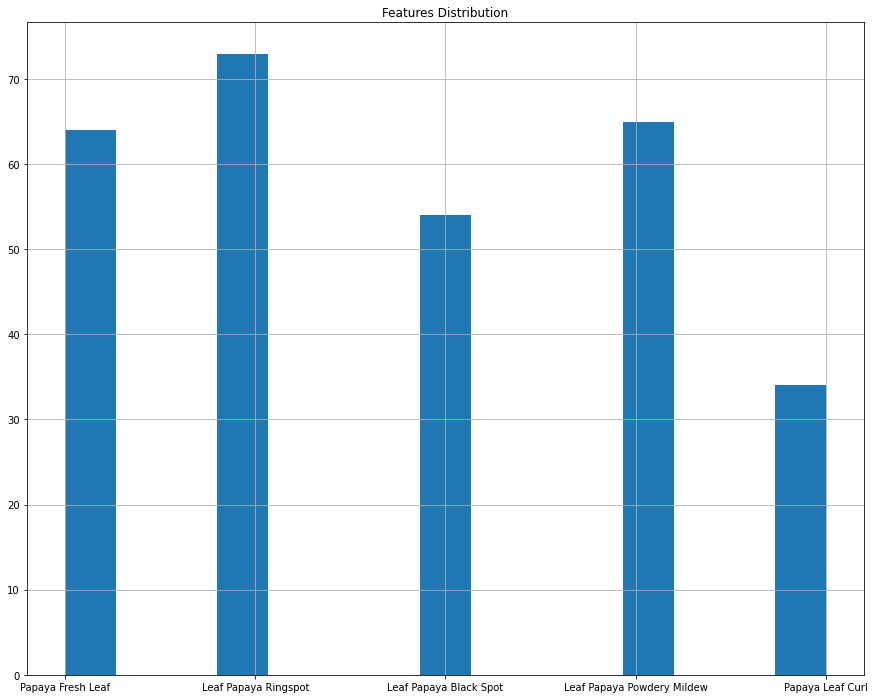

In [54]:
df['Class'].hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [55]:
df['Class'].unique()

array(['Papaya Fresh Leaf', 'Leaf Papaya Ringspot',
       'Leaf Papaya Black Spot', 'Leaf Papaya Powdery Mildew',
       'Papaya Leaf Curl'], dtype=object)

In [56]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Class']= label_encoder.fit_transform(df['Class'])
  
df['Class'].unique()

array([3, 2, 0, 1, 4])

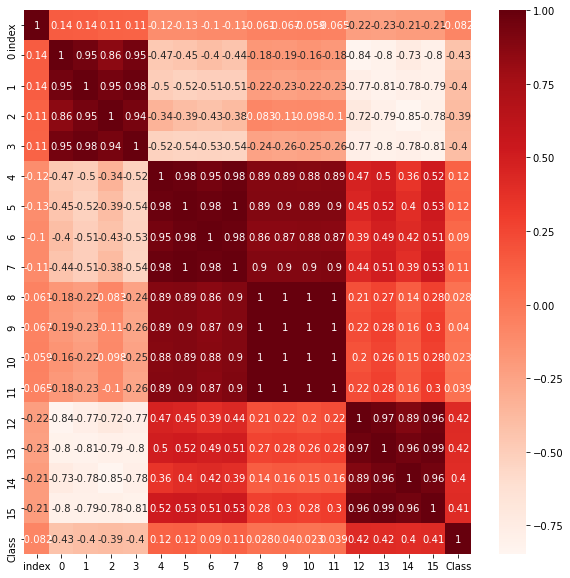

In [57]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [58]:

df.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Class
0,0,1.999632,3.093702,2.033272,3.002799,0.633460,0.571372,0.635272,0.581739,0.170648,0.156667,0.172241,0.159826,0.865883,0.791993,0.863330,0.798109,3
1,1,0.722365,1.579700,1.301654,1.719493,0.915808,0.885972,0.889406,0.879521,0.718141,0.713230,0.715649,0.712989,0.988634,0.975208,0.979519,0.973014,3
2,2,0.699969,1.998093,1.621354,1.975702,0.925097,0.882642,0.889191,0.881281,0.749311,0.742571,0.745322,0.742694,0.986119,0.960490,0.967848,0.960933,3
3,3,0.358762,0.608781,0.472656,0.670496,0.911386,0.891686,0.896863,0.882874,0.404194,0.393967,0.397970,0.391944,0.989202,0.981726,0.985777,0.979875,3
4,4,0.322227,0.559339,0.365273,0.499239,0.914601,0.890028,0.899300,0.885933,0.430124,0.416377,0.423192,0.414672,0.989225,0.981354,0.987790,0.983360,3


In [59]:
X = df.drop('Class',axis=1)
y = df['Class']

In [60]:
X.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1.999632,3.093702,2.033272,3.002799,0.633460,0.571372,0.635272,0.581739,0.170648,0.156667,0.172241,0.159826,0.865883,0.791993,0.863330,0.798109
1,1,0.722365,1.579700,1.301654,1.719493,0.915808,0.885972,0.889406,0.879521,0.718141,0.713230,0.715649,0.712989,0.988634,0.975208,0.979519,0.973014
2,2,0.699969,1.998093,1.621354,1.975702,0.925097,0.882642,0.889191,0.881281,0.749311,0.742571,0.745322,0.742694,0.986119,0.960490,0.967848,0.960933
3,3,0.358762,0.608781,0.472656,0.670496,0.911386,0.891686,0.896863,0.882874,0.404194,0.393967,0.397970,0.391944,0.989202,0.981726,0.985777,0.979875
4,4,0.322227,0.559339,0.365273,0.499239,0.914601,0.890028,0.899300,0.885933,0.430124,0.416377,0.423192,0.414672,0.989225,0.981354,0.987790,0.983360


In [61]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Class, dtype: int32

# Feature Scaling and Normalization

In [62]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
  
scaler = StandardScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)

C:\Users\Arifin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Arifin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

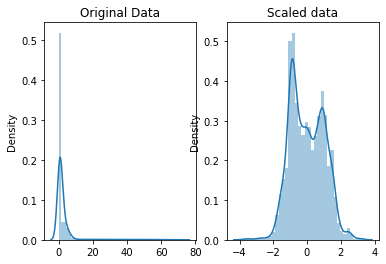

In [63]:
fig, ax = plt.subplots(1,2)
sns.distplot(df.drop('Class',axis=1), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(X, ax=ax[1])
ax[1].set_title("Scaled data")

In [64]:
X=((X-X.min())/(X.max()-X.min()))*10

C:\Users\Arifin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Arifin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

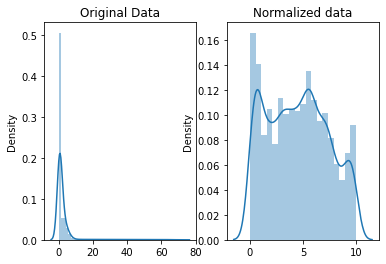

In [65]:
n_df=X
n_df['Class']=y
fig, ax=plt.subplots(1,2)
sns.distplot(df, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(n_df, ax=ax[1])
ax[1].set_title("Normalized data")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   290 non-null    int64  
 1   0       290 non-null    float64
 2   1       290 non-null    float64
 3   2       290 non-null    float64
 4   3       290 non-null    float64
 5   4       290 non-null    float64
 6   5       290 non-null    float64
 7   6       290 non-null    float64
 8   7       290 non-null    float64
 9   8       290 non-null    float64
 10  9       290 non-null    float64
 11  10      290 non-null    float64
 12  11      290 non-null    float64
 13  12      290 non-null    float64
 14  13      290 non-null    float64
 15  14      290 non-null    float64
 16  15      290 non-null    float64
 17  Class   290 non-null    int32  
dtypes: float64(16), int32(1), int64(1)
memory usage: 39.8 KB


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2,stratify=y)
X_train = X_train.assign(dataset='train')
X_train = pd.concat([X_train, y_train], axis = 1)
X_test = X_test.assign(dataset='test')
X_test = pd.concat([X_test, y_test], axis = 1)
X_train.shape, X_test.shape
X_rf = pd.concat([X_train, X_test])

#We encode the old target variable for the classifier
X_rf = pd.get_dummies(X_rf, columns=['Class'])

#The dataset column - that is, whether the datapoint belongs to the training or the test dataset - is exactly what we are trying to predict
y_rf = X_rf.pop('dataset')

#The following is just a good and old Random Forest classifier




In [68]:
X_train, X_test, y_train, y_test = train_test_split(
     X_rf, y_rf, test_size=0.5, random_state=0)

In [69]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,Class_0,Class_1,Class_2,Class_3,Class_4,Class_0,Class_1,Class_2,Class_3,Class_4
117,7.361111,2.806343,4.825841,4.824370,4.102263,4.428226,2.217311,2.610319,2.837537,0.593427,...,0,0,1,0,0,0,0,1,0,0
169,4.444444,4.575919,5.304581,3.474397,5.088840,2.477880,1.325660,2.847252,1.808854,0.277980,...,1,0,0,0,0,1,0,0,0,0
163,3.611111,2.384106,3.339872,3.477118,3.510598,4.441563,3.265008,3.636485,3.352285,0.584400,...,1,0,0,0,0,1,0,0,0,0
27,3.750000,0.706425,1.260811,1.418936,1.440714,9.574068,9.567906,9.318813,9.365049,10.000000,...,0,0,0,1,0,0,0,0,1,0
259,0.416667,7.001631,7.319827,6.515883,7.966250,1.156744,0.491959,1.173107,0.558511,0.057555,...,0,0,0,0,1,0,0,0,0,1


# Model training

## KNN

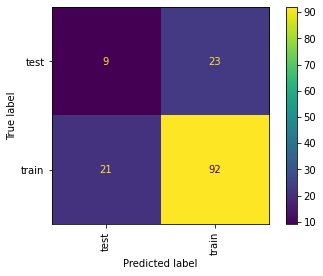

In [70]:

  
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.xticks(rotation = 90)
plt.show()

# Predictions and Evaluations
# Let's evaluate our KNN model ! 


In [71]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

        test       0.30      0.28      0.29        32
       train       0.80      0.81      0.81       113

    accuracy                           0.70       145
   macro avg       0.55      0.55      0.55       145
weighted avg       0.69      0.70      0.69       145



In [72]:
from sklearn import metrics
error_rate = []
scores = []

k=40
max_accuracy=0
best_k=1

for i in range(1, k):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    y_predict = knn.predict(X_test)
    curr_accuracy=metrics.accuracy_score(y_test,y_predict)
    if curr_accuracy>max_accuracy:
        max_accuracy=curr_accuracy
        best_k=i
    scores.append(curr_accuracy)
  


Text(0, 0.5, 'Error Rate')

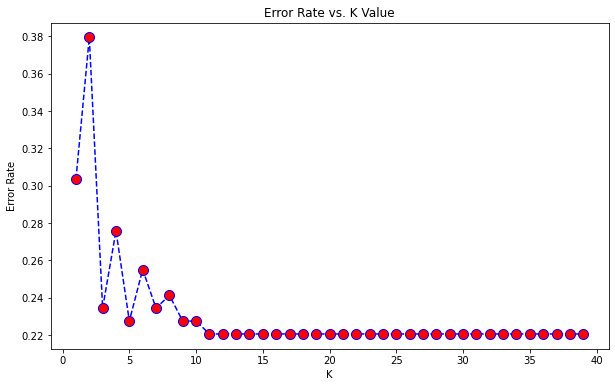

In [73]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, k), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

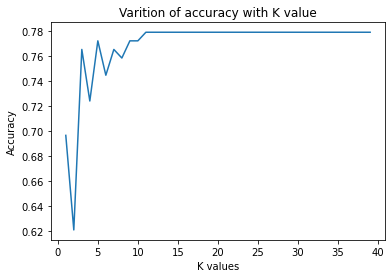

In [74]:
plt.plot(np.arange(1,k),scores)
plt.title('Varition of accuracy with K value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [75]:
knn = KNeighborsClassifier(n_neighbors = best_k)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))
kNN_Score = max_accuracy*100
print("Accuracy for k = {} is {}%".format(best_k,max_accuracy*100))

              precision    recall  f1-score   support

        test       0.00      0.00      0.00        32
       train       0.78      1.00      0.88       113

    accuracy                           0.78       145
   macro avg       0.39      0.50      0.44       145
weighted avg       0.61      0.78      0.68       145

Accuracy for k = 11 is 77.93103448275862%


C:\Users\Arifin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arifin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arifin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [76]:
from sklearn.svm import SVC
svm_model= SVC()
tuned_parameters = {
 'C': (np.arange(1,20)) , 'kernel': ['linear'],
 'C': (np.arange(1,20)) ,  'kernel': ['rbf'],
 'C':(np.arange(1,20)) , 'kernel':['poly']
                   }
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train,y_train)
print('best hyperlink parameters')
print(model_svm.best_params_)
y_pred= model_svm.predict(X_test)
print('Accuracy Score:')

print(classification_report(y_test, y_pred))

best hyperlink parameters
{'C': 1, 'kernel': 'poly'}
Accuracy Score:
              precision    recall  f1-score   support

        test       0.00      0.00      0.00        32
       train       0.78      1.00      0.88       113

    accuracy                           0.78       145
   macro avg       0.39      0.50      0.44       145
weighted avg       0.61      0.78      0.68       145



C:\Users\Arifin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arifin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arifin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
SVM_Score = accuracy_score(y_pred,y_test)*100
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_pred,y_test)*100))

Model accuracy score: 77.9310%


## Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB

# instantiate the model
bnb = BernoulliNB()

# fit the model
bnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
NB_Score = accuracy_score(y_test, y_pred)*100
print(classification_report(y_test, y_pred))


NameError: name 'gnb' is not defined

In [ ]:
print('Model accuracy score: {0:0.4f}%'. format(NB_Score))

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model
lr.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
LR_Score=accuracy_score(y_test, y_pred)*100
print(classification_report(y_test, y_pred))


In [ ]:
print('Model accuracy score: {0:0.4f}%'. format(LR_Score))

# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
DT_Score=accuracy_score(y_test, y_pred)*100
print(classification_report(y_test, y_pred))

In [ ]:
print('Model accuracy score: {0:0.4f}%'. format(DT_Score))

# K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1


In [ ]:
Bnb = BernoulliNB()
Score = cross_val_score(Bnb, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(Score)
print('Model accuracy score for Gaussian Naive Bayes - K Fold : {0:0.4f}%'.format(Score.mean()*100))

In [ ]:
score = cross_val_score(lr, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
LR_Score = score.mean()*100
print('Model accuracy score for Logistic Regression - K Fold : {0:0.4f}%'.format(score.mean()*100))

In [ ]:
print('Model accuracy score for KNN: {0:0.4f}%'. format(kNN_Score))
print('Model accuracy score for SVM: {0:0.4f}%'. format(SVM_Score))
print('Model accuracy score for Decision Tree: {0:0.4f}%'. format(DT_Score))
print('Model accuracy score for Naive Bayes: {0:0.4f}%'. format(NB_Score))
print('Model accuracy score for Logistic Regression using K-Fold : {0:0.4f}%'. format(LR_Score))